# TLDR: Macro Avg. F1 = 35% (5 Classes)
# TLDR: Macro Avg. F1 = 73% (2 Classes)

# Default Setup

In [ ]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 3.9MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [ ]:
df = pd.read_csv(path_root + data_root + "AmazonAlexaReview/amazon_alexa.tsv", sep="\t")
text = df['verified_reviews'].to_list()
labels = df['rating'].astype(str).to_list()

X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

## Classification for 5 Classes

Classification: 100%|██████████| 630/630 [00:00<00:00, 44223.72it/s]



              precision    recall  f1-score   support

           1       0.35      0.48      0.41        23
           2       0.13      0.18      0.15        28
           3       0.17      0.19      0.18        36
           4       0.19      0.28      0.22        69
           5       0.86      0.76      0.81       474

    accuracy                           0.64       630
   macro avg       0.34      0.38      0.35       630
weighted avg       0.70      0.64      0.66       630


 Accuracy: 0.638

[ updating evaluations cache ]


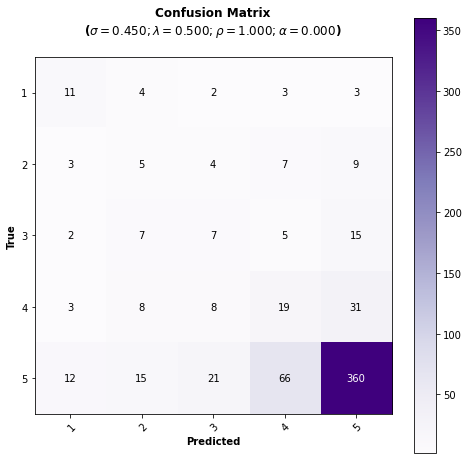

0.3536350554272329

In [ ]:
clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

# Classification with 2 Classes
Here we map the values 1-3 to negative and the values 4,5 to positive.

Classification: 100%|██████████| 630/630 [00:00<00:00, 45653.27it/s]



              precision    recall  f1-score   support

    negative       0.45      0.69      0.55        77
    positive       0.95      0.88      0.92       553

    accuracy                           0.86       630
   macro avg       0.70      0.79      0.73       630
weighted avg       0.89      0.86      0.87       630


 Accuracy: 0.860

[ updating evaluations cache ]


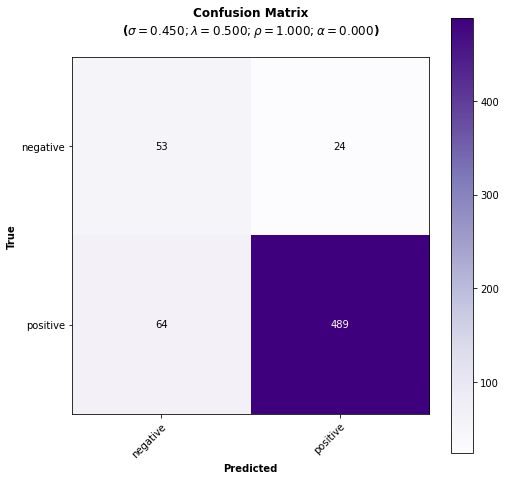

0.7319200789153014

In [ ]:
new_labels = df['rating'].astype(str).replace(to_replace={'1': 'negative', '2': 'negative', '3': 'negative', '4': 'positive', '5': 'positive'}, regex=True).to_list()

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(text, new_labels, test_size=0.2)
clf = SS3()
clf.fit(X_train_2, y_train_2)
Evaluation.clear_cache()
Evaluation.test(clf, X_val_2, y_val_2, metric="f1-score")